# **<span style="font-size:larger;"> 03: <span style="color:blue">Model Selection & Evaluation</span>** #

In [37]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

stops = (set(stopwords.words('english')))

In [15]:
# Read Data
df = pd.read_csv('../data/full_df.csv')

In [16]:
df.dropna(inplace=True)

# **3.1 Model Setup**

### Baseline

In [17]:
df['is_AnimalsBeingJerks'].value_counts(normalize=True)

0    0.503726
1    0.496274
Name: is_AnimalsBeingJerks, dtype: float64

As is, if my model were to predict that every submission were from r/animalsbeingjerks, the model would be correct 50.3% of the time. Our goal is to improve this percentage.

### Train Test Split

In [18]:
X = df['stemmed'] # Chose stemmed over lemmatized as it seemed to perform better
y = df['is_AnimalsBeingJerks']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

# **3.2 Pipeline and GridSearchCV**

The `Pipeline` and `GridSearchCV` tools allow us to program multiple hyperparameters across our models. It will generate a model with each combination of our desired hyperparameters and optimize the highest-scoring result.

We will run a single model for each of the following 8 classifiers:

- Logistic Regression
- Bernouli Naive Bayes
- Multinomial Naive Bayes
- Random Forest
- Gradient Boost
- AdaBoost
- Support Vector Machine
- K-Nearest Neighbors

We will run two GridSearches to benchmark these models for two feature extraction techniques: `CountVectorizer` and `TfidfVectorizer`. We can use the accuracy of the results to narrow our model selection to the most effective approaches.

## 1. Logistic Regression

**TFIDF**

In [19]:
pipe = Pipeline([    
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression()),
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1),(1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ', gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None}
Best Estimator Score Train:  0.8403765690376569
Best Estimator Score Test:  0.7213680577345466


**Count Vectorizer**

In [20]:
pipe = Pipeline([    
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1),(1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': None}
Best Estimator Score Train:  0.9784518828451882
Best Estimator Score Test:  0.7251333542516473


## 2. Bernouli Naive Bayes

**TFIDF**

In [21]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('bnb', BernoulliNB())
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}
Best Estimator Score Train:  0.9401673640167364
Best Estimator Score Test:  0.728898650768748


**Count Vectorizer**

In [22]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('bnb', BernoulliNB())
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': None}
Best Estimator Score Train:  0.9401673640167364
Best Estimator Score Test:  0.728898650768748


## 3. Multinomial Naive Bayes

**TFIDF**

In [23]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}
Best Estimator Score Train:  0.943723849372385
Best Estimator Score Test:  0.73046752431754


**Count Vectorizer**

In [24]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': None}
Best Estimator Score Train:  0.9439330543933054
Best Estimator Score Test:  0.7329777219956072


## 4. Random Forest Classifier

**TFIDF**

In [25]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1), (1,2)]
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}
Best Estimator Score Train:  0.9960251046025105
Best Estimator Score Test:  0.6975211797929087


**Count Vectorizer**

In [26]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': None}
Best Estimator Score Train:  0.9960251046025105
Best Estimator Score Test:  0.7037966739880765


## 5. Gradient Boosting Classifier

**TFIDF**

In [27]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}
Best Estimator Score Train:  0.6928870292887029
Best Estimator Score Test:  0.6564166928145592


**Count Vectorizer**

In [28]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': None}
Best Estimator Score Train:  0.6926778242677825
Best Estimator Score Test:  0.657044242234076


## 6. Ada Boost Classifier

**TFIDF**

In [29]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('ab', AdaBoostClassifier(random_state=42))
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': {'few', 'am', 'all', 'ain', 'd', 'themselves', 'who', 'been', 'have', 'did', 'against', 'below', 'himself', 'for', 'i', 'theirs', 'after', "don't", "you'd", 'no', 'an', 'wouldn', 'was', 'and', 'under', "shan't", "needn't", 'ours', 'which', 'don', 'then', 'those', 'my', 'are', "you're", 'were', 'whom', 'during', 'itself', 'between', 'is', "couldn't", 'why', 't', 'these', "weren't", "should've", 'now', "haven't", "shouldn't", "hadn't", 'or', "you'll", 'the', 'most', 'wasn', 'our', 'them', 'this', 'here', 'couldn', "it's", 'because', "mustn't", "didn't", "mightn't", 'her', 'had', "won't", 've', 'they', 'it', 'other', 'hadn', 'ourselves', 'at', 'where', 'needn', 'yourself', 'myself', 'by', 'do', 'but', 'yours', 'until', 'than', 'its', 're', 'having', 'same', 'isn', 'while', "that'll", 'doing', 'shouldn', 'hers', 'in', 'll', 'of', 'there', "aren't", 'not', 'out', 'wh

**Count Vectorizer**

In [30]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('ab', AdaBoostClassifier(random_state=42))
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': None}
Best Estimator Score Train:  0.6596234309623431
Best Estimator Score Test:  0.6523376215877


## 7. Support Vector Machine

**TFIDF**

In [31]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(random_state=42))
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None}
Best Estimator Score Train:  0.9547071129707113
Best Estimator Score Test:  0.7317226231565735


**Count Vectorizer**

In [32]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('svc', SVC(random_state=42))
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': None}
Best Estimator Score Train:  0.9150627615062762
Best Estimator Score Test:  0.714465014119862


## 8. KNeighbors Classifier

**TFIDF**

In [33]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

params = {
    'tfidf__stop_words' : [None, stops],
    'tfidf__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': {'few', 'am', 'all', 'ain', 'd', 'themselves', 'who', 'been', 'have', 'did', 'against', 'below', 'himself', 'for', 'i', 'theirs', 'after', "don't", "you'd", 'no', 'an', 'wouldn', 'was', 'and', 'under', "shan't", "needn't", 'ours', 'which', 'don', 'then', 'those', 'my', 'are', "you're", 'were', 'whom', 'during', 'itself', 'between', 'is', "couldn't", 'why', 't', 'these', "weren't", "should've", 'now', "haven't", "shouldn't", "hadn't", 'or', "you'll", 'the', 'most', 'wasn', 'our', 'them', 'this', 'here', 'couldn', "it's", 'because', "mustn't", "didn't", "mightn't", 'her', 'had', "won't", 've', 'they', 'it', 'other', 'hadn', 'ourselves', 'at', 'where', 'needn', 'yourself', 'myself', 'by', 'do', 'but', 'yours', 'until', 'than', 'its', 're', 'having', 'same', 'isn', 'while', "that'll", 'doing', 'shouldn', 'hers', 'in', 'll', 'of', 'there', "aren't", 'not', 'out', 'wh

**Count Vectorizer**

In [34]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

params = {
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': None}
Best Estimator Score Train:  0.7631799163179916
Best Estimator Score Test:  0.6225290241606527


Overall, Multinomial Naive Bayes (CountVectorized) proved to be the most efficient model. We will continue to tune the parameters to optimize this model as much as possible.

# **3.3 Model Selection & Optimization**

Looking at model types, we can see that the Count Vectorized Multinomial Naive Bayes models performed best on an initial run.

### **Multinomial Naive Bayes (CVEC)**

**Best Parameters:**
- cv__ngram_range: (1, 2)
- cv__stop_words: None

**Scores:**
- Training Score:  0.9439330543933054
- Testing Score:  0.7329777219956072


Our goal while fine tuning our model is to improve these scores.

### Optimizing Model

In [35]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

params = {
    'cv__min_df': [1, 2],
    'cv__stop_words' : [None, stops],
    'cv__ngram_range' : [(1,1),(1,2), (1,3)],
    'mnb__alpha' : [0.1, 1, 10,100],
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params:  {'cv__min_df': 1, 'cv__ngram_range': (1, 2), 'cv__stop_words': None, 'mnb__alpha': 1}
Best Estimator Score Train:  0.9439330543933054
Best Estimator Score Test:  0.7329777219956072


Unfortunately, even with extra parameters, we are unable to improve our model. It is important to note that the addition of custom stop words did not improve our model.

# **3.4 Model Evaluation**

### Confusion Matrix

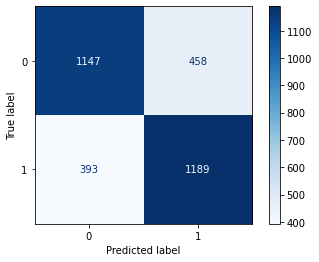

In [39]:
# Create predictions variable
preds = gs.predict(X_test)

# Create confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

#Create confusion matrix visual
labels = ['r/HumansBeingBros', 'r/AnimalsBeingJerks']
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues');

This confusion matrix shows that the model incorrectly predicted r/AnimalsBeingJerks (1) when it was actually r/AnimalsBeingBros (0) 458 times. Also, the model incorrectly predicted r/AnimalsBeingBros (0) when it was actually r/AnimalsBeingJerks (1) 393 times. 

More specifically, this is how our model performed:

In [40]:
print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.7329777219956072
Misclassification Rate:  0.2670222780043928
Sensitivity:  0.7515802781289507
Specificity:  0.7146417445482866
Precision:  0.7219186399514268


## Probability Data Frame

A Data Frame will be created to display the probabilities of titles being in each subreddit. Further investigation will be done to determine why the model misclassified certain titles.

In [41]:
preds = pd.DataFrame({
    'title' : X_test, 
    'actual' : y_test, 
    'predicted' : gs.predict(X_test),
    'P(r/AnimalsBeingBros)' : [i[0] for i in gs.predict_proba(X_test)],
    'P(r/AnimalsBeingJerks)' : [i[1] for i in gs.predict_proba(X_test)]})
preds['Prob Diff'] = np.abs(preds['P(r/AnimalsBeingBros)'] - preds['P(r/AnimalsBeingJerks)'])

### Top 5 Titles with the Highest Probability of Being in r/AnimalsBeingBros

In [42]:
pd.set_option('display.max_colwidth', None)
preds.sort_values(by='P(r/AnimalsBeingBros)', ascending=False).head()

,title,actual,predicted,P(r/AnimalsBeingBros),P(r/AnimalsBeingJerks),Prob Diff
1863,các con vật tiếng việt them học nói tên các loài động vật biển dại trẻ thông minh sớm,0,0,1.0,8.368885e-48,1.0
1581,dại bé học nói các con vật tiếng việt them tập nhận biết tiếng kêyou động vật dại trẻ thông minh sớm,0,0,1.0,6.671777e-55,1.0
2081,them học con vật bé tập nói tên các loài động vật sống dưới biển tiếng v ...,0,0,1.0,2.718824e-32,1.0
1529,động vật hoang dã dại bé học đọc con vật bằng tiếng anh dại trẻ thông minh sớm,0,0,1.0,2.886881e-38,1.0
1762,con vật và tiếng kêyou them tập nói tên động vật tiếng việt và học tiếng kêyou dại trẻ thông minh sớm,0,0,1.0,3.202637e-57,1.0


Well, this is certainly interesting. Google translate informs me that in Vietnamese, the first title roughly says, "Vietnamese animals learn to say the names of wild sea animals, young and intelligent, early." Perhaps there is a Vietnamese active user  on r/AnimalsBeingBros and our model was able to accurately predict which subreddit these titles belong in based on their language.

### Top 5 Titles with the Highest Probability of Being in r/AnimalsBeingJerks

In [43]:
pd.set_option('display.max_colwidth', None)
preds.sort_values(by='P(r/AnimalsBeingJerks)', ascending=False).head()

,title,actual,predicted,P(r/AnimalsBeingBros),P(r/AnimalsBeingJerks),Prob Diff
12306,gari thought it would be funni to have a poo in the kitchen right in front of us a few day befor she pass away ... safe to say she could not have care less 😂,1,1,1.092695e-11,1.0,1.0
12274,she want pictur of the alpaca he wa be an unwiped-asshol to her all morn i just want to send my friend a christma video thi wa the christma gift i did not know i want,1,1,3.279176e-11,1.0,1.0
8038,our belov pet wild magpi ha recent start smash it is head off our window whi it is 5am and ha been at it for 18 hour give or take a few tea break,1,1,5.264108e-11,1.0,1.0
11622,one of the cat threw up on my charg cord it dri and i did not notic when i put it into my phone to charg befor pass out now my phone charg port is rusti dude i have had thi phone for 4 month my phone is pivot in my art work,1,1,1.624650e-10,1.0,1.0
6574,slap slap slap slap slap ...,1,1,5.329238e-10,1.0,1.0


There are no surprises here. "One of the cats threw up on my charging cord. It dried and I didn't notice when I put it into my phone to charge before passing out. Now my phones charging port is rusty. Dude ive had this phone for 4 months, my phone is pivotal in my art work,” is a personal favorite.

### Top 10 Misclassified Titles with a High Probability Difference

These are titles the model misclassified with high confidence.

In [44]:
pd.set_option('display.max_colwidth', None)
diff = preds.loc[preds['actual'] != preds['predicted']]
diff.sort_values(by='Prob Diff', ascending = False).head(10)

,title,actual,predicted,P(r/AnimalsBeingBros),P(r/AnimalsBeingJerks),Prob Diff
232,i did not join in anticip that internet date would work and then unexpectedli found the perfect partner and am veri veri happi mmnonqcjn,0,1,4.519490e-08,1.000000,1.000000
3475,do not realli know where to post thi but i need help thi is my mom dog- rescu she enter him into thi contest and doe not want to ask anyon to vote so she will not be disappoint when they do not ☹️ if you could just click the vote button it would make my mom day,0,1,6.076523e-08,1.000000,1.000000
2162,do not let thi get your goat ... but can not we all just get along,0,1,2.749415e-05,0.999973,0.999945
2691,funni goat d hilari goat make strang nois as he tri to get food,0,1,3.872287e-05,0.999961,0.999923
4573,he hurt hi back left paw so i gave him a pain killer and he pass out on me she came and cuddl close but not too close just keep her paw on top of hi so she know hi everi move,0,1,6.090207e-05,0.999939,0.999878
4080,my cat sit on nthe stair when it rain and he been do thi for the last few day and i feel bad for him,0,1,9.934490e-05,0.999901,0.999801
2694,cat decid she wa not move ...... and i wa late for work😂,0,1,1.128772e-04,0.999887,0.999774
4278,i got lost backpack in malaysia and found thi woofer she wa super wari at first but open right up after some pat then she walk with me for about 5 mile until i found my way back to my hostel,0,1,1.300542e-04,0.999870,0.999740
4584,my dogo is alway look at my garden through the window even if it is alway the same thing i start to look with my dog and i got so relax that now i do it everi day,0,1,1.399412e-04,0.999860,0.999720
10246,my best friend forev,1,0,9.998534e-01,0.000147,0.999707


Some of these titles would be difficult even for a human to correctly classify. Titles like "My best friend forever," would intuitively belong in r/AnimalsBeingBros, however this belonged in r/AnimalsBeingJerks. Unfortunatey, there is not a lot that my model can do to better predict those misclassifications.

### Top 10 Misclassified Titles with a Low Probability Difference

These are titles the model misclassified with low confidence.

In [45]:
diff.sort_values(by='Prob Diff', ascending = False).tail(10)

,title,actual,predicted,P(r/AnimalsBeingBros),P(r/AnimalsBeingJerks),Prob Diff
10586,tırtıl,1,0,0.503766,0.496234,0.007531
12028,angeri,1,0,0.503766,0.496234,0.007531
11895,choooommmmppppppppppppppppp,1,0,0.503766,0.496234,0.007531
10162,lipstick,1,0,0.503766,0.496234,0.007531
11508,heheheheh 🤣🤣🤣🤣🤣🤣,1,0,0.503766,0.496234,0.007531
10623,aboos,1,0,0.503766,0.496234,0.007531
10494,i log onto a famili photo album and thi wa the first photo upload ...,1,0,0.503743,0.496257,0.007486
10851,duck v. cat,1,0,0.503720,0.496280,0.007440
5882,🔥 a smile black crest macaqu by mogen troll,0,1,0.496861,0.503139,0.006278
2833,close friend see you later,0,1,0.499212,0.500788,0.001577


Again, some of these titles would be difficult even for a human to correctly classify. One worded titles like "aboos," and "lipstick" would be very difficult to predict on. Unfortunatey, there is not a lot that my model can do to better predict those misclassifications.

# **3.5 Recommendations & Conclusions**

### Recommendations to Improve Our Model

The first recommendation to improve our model would be to collect more data. Since both of these subreddits are not text heavy, more posts should be collected. Second, another recommendation would be to include comments as a feature. At just an average of 6 words in each title, adding comments to our data would likely improve our model. My last recommendation would be to investigate more parameters.
As wonderful as Pipelines and GridSearchCV are, using them in practice can be incredibly time consuming. More extensive searches with different parameters can be conducted to further optimize our model.

### Conclusions

With an average of just 6 words in each title to make predictions on, the model performed well. With many one worded, emoji, and slang titles, classifying these titles into their correct subreddits would be a task even humans would find difficult to do. The question remains answered; with a 45.7% improvement from our baseline model, yes, a model can outperform our baseline model when predicting which of two non text-heavy subreddits a post came from. 

# ***Want More?***

## [Presentation PDF](https://git.generalassemb.ly/ksylvia16/submissions_614/blob/master/Projects/project_3/presentation/Reddit%20API%20%26%20NLP%20Presentation.pdf)